<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Mini%20Project/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

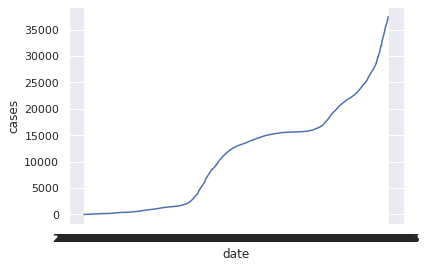

In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
last_30days = datetime.datetime.now() - datetime.timedelta(30)
last_two_weeks = datetime.datetime.now() - datetime.timedelta(14)


%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

ohio = df[(df['state']=='Ohio')& (df['county'] == 'Medina')]
sns.lineplot(data = ohio, x = 'date' , y = 'cases')



:Import all required libraries that are needed for data analysis

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [82]:
df.head()


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122136 entries, 0 to 2122135
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 97.1+ MB


Text(0, 0.5, 'Cases')

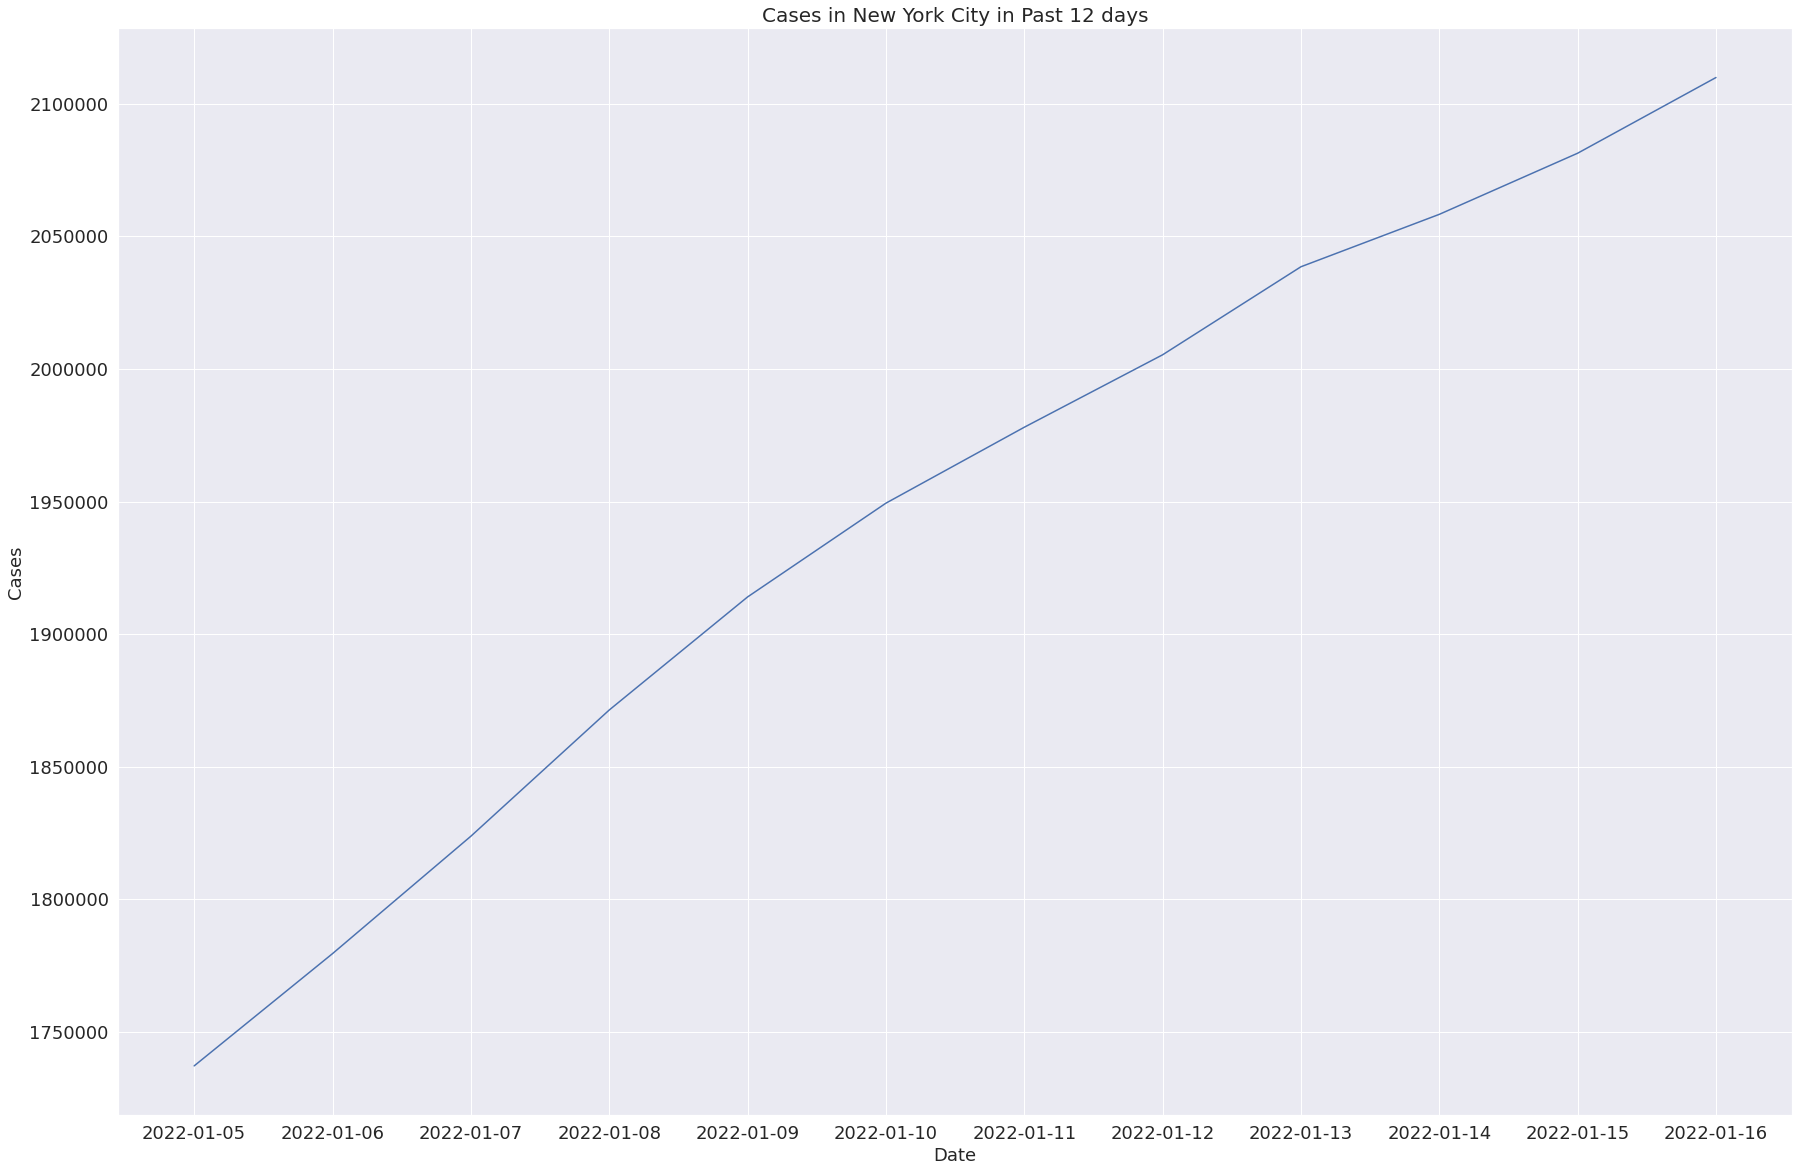

In [100]:
df.info()
#df['state'].unique()

new_york_city = df[(df['state']=='New York') & (df['county'] == 'New York City') & (pd.to_datetime(df['date']) >= last_two_weeks)]

new_york_state = df[df['state'] == 'New York']
sns.set(rc = {'figure.figsize':(30,20)})
sns.lineplot(data = new_york_city, x = 'date' , y = 'cases')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Cases in New York City in Past 12 days", fontsize=20)
plt.xticks(fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.yticks(fontsize=18) 
plt.ylabel("Cases", fontsize=18)


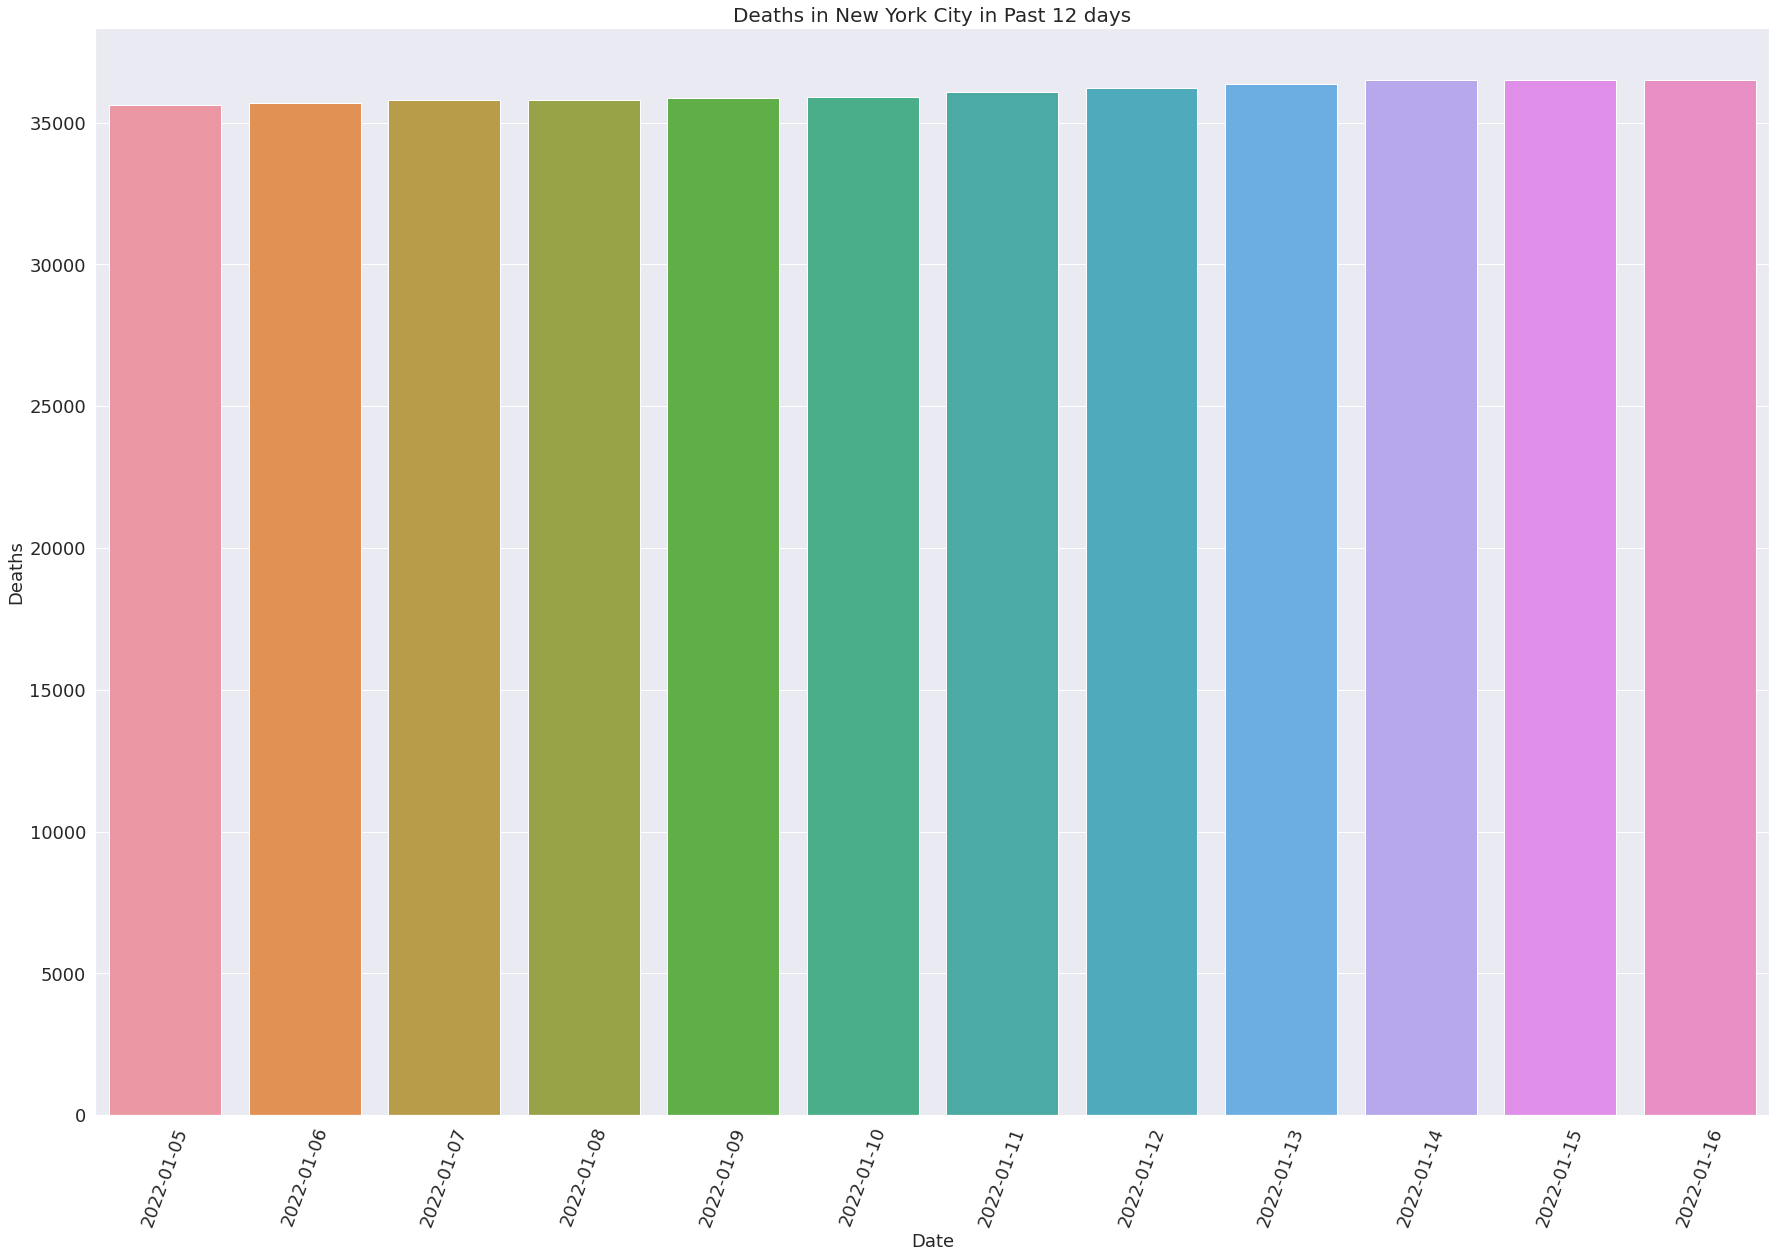

In [101]:
#sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(x="date", y="deaths", data=new_york_city)
plt.title("Deaths in New York City in Past 12 days", fontsize=20)
plt.xticks(fontsize=18, rotation=70)
plt.xlabel("Date", fontsize=18)
plt.yticks(fontsize=18) 
plt.ylabel("Deaths", fontsize=18)
plt.ticklabel_format(style='plain', axis='y')

# Task4: Understand NY covid 19 data in last 30 days

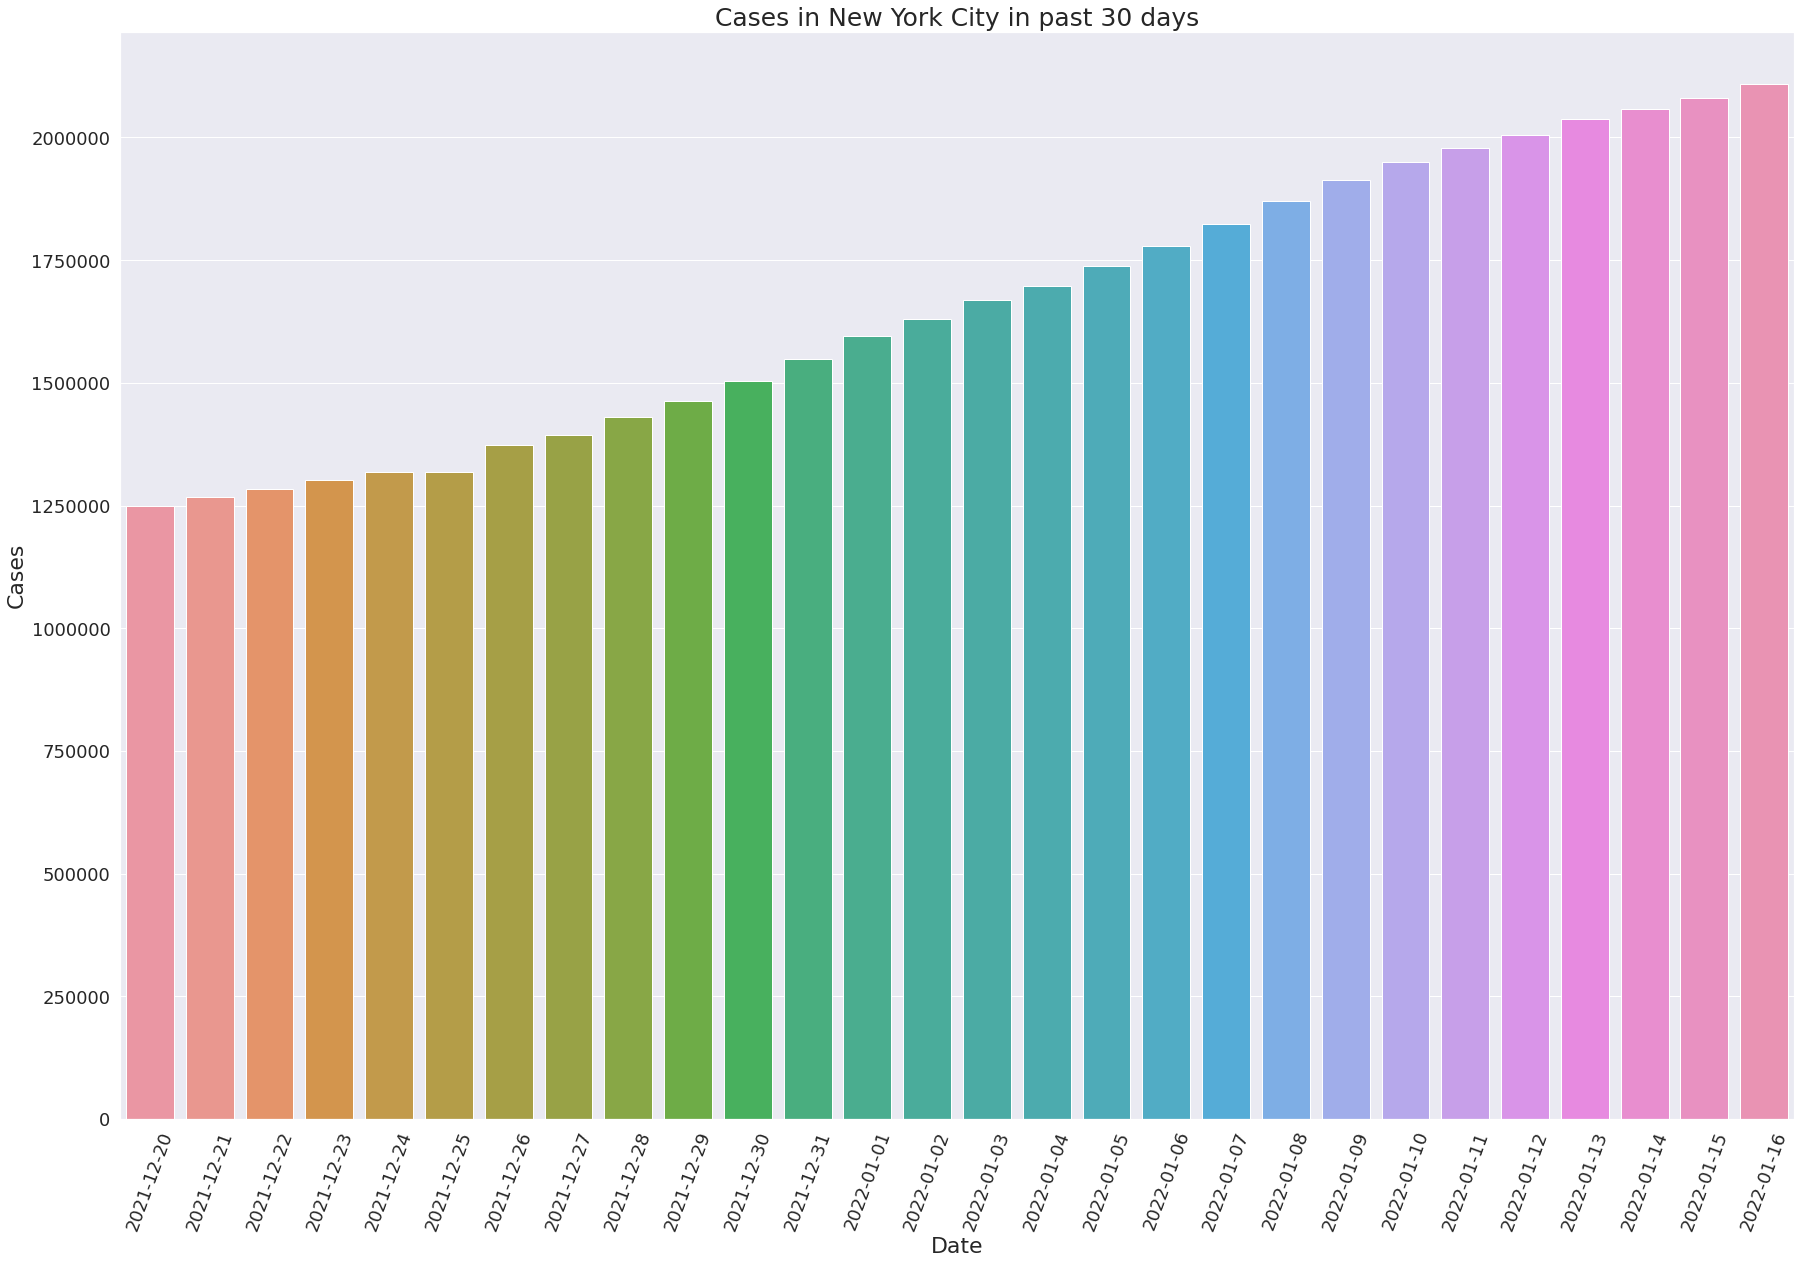

In [102]:
new_york_city = df[(df['state']=='New York') & (df['county'] == 'New York City') & (pd.to_datetime(df['date']) >= last_30days)]
sns.barplot(data = new_york_city, x = 'date' , y = 'cases')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Cases in New York City in past 30 days", fontsize=25)
plt.xticks(fontsize= 18, rotation=70)
plt.xlabel("Date", fontsize=22)
plt.yticks(fontsize=18) 
plt.ylabel("Cases", fontsize=22)
plt.ticklabel_format(style='plain', axis='y')


# Comparing Covid 19 data with different states

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 2083304 to 2120789
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1392 non-null   object
 1   state   1392 non-null   object
 2   cases   1392 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 43.5+ KB


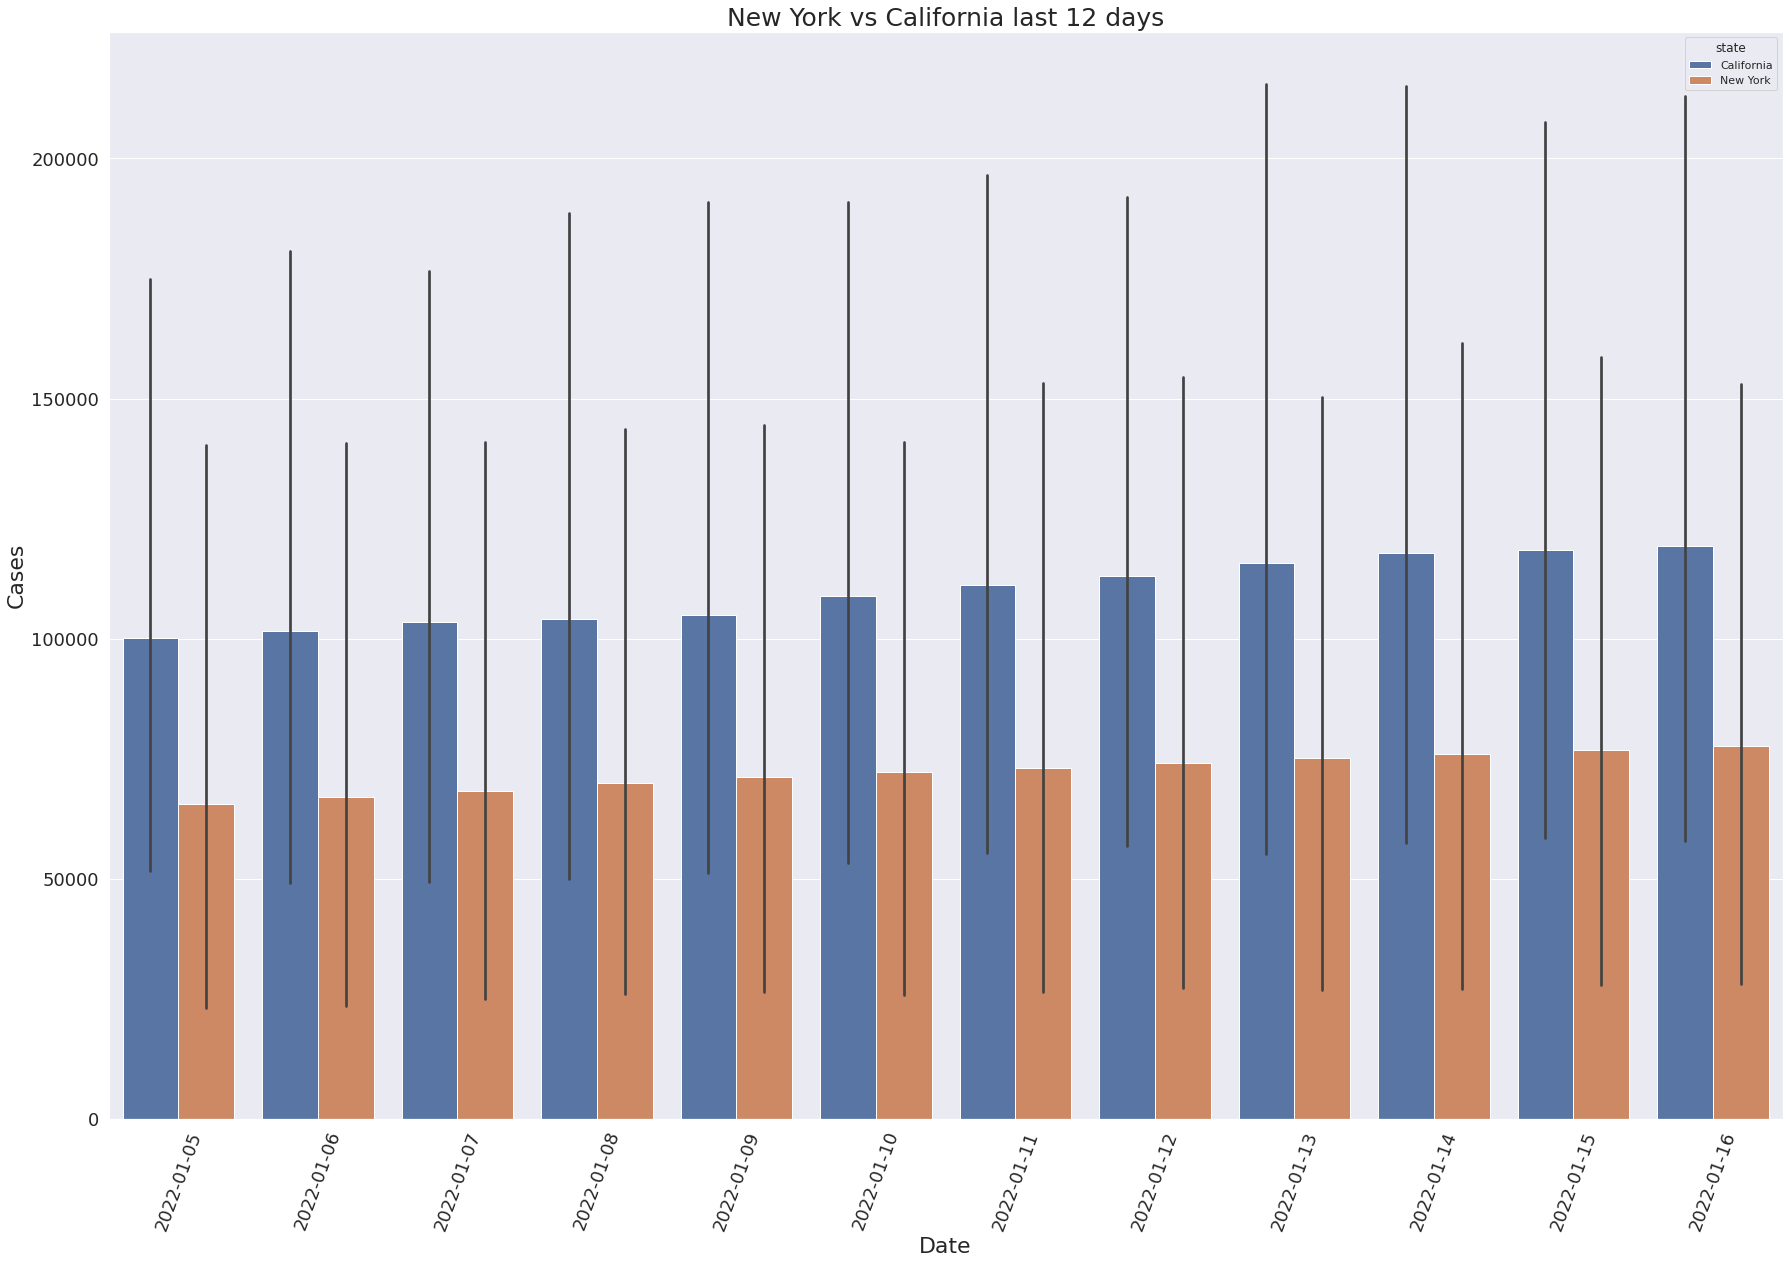

In [103]:
#compoaring last two weeks covid cases between New York State and California

NY_and_CA = df[((df['state']=='New York') | (df['state'] == 'California')) & (pd.to_datetime(df['date']) >= last_two_weeks)]

drop_columns = ["county","deaths", "fips"]

NY_and_CA.drop(drop_columns, axis=1).info()

sns.barplot(x="date", y = "cases", hue="state", data=NY_and_CA)
plt.title("New York vs California last 12 days", fontsize=25)
plt.xticks(fontsize= 18, rotation=70)
plt.xlabel("Date", fontsize=22)
plt.yticks(fontsize=18) 
plt.ylabel("Cases", fontsize=22)
plt.ticklabel_format(style='plain', axis='y')

# Conclusion

Below are the conclusions:



1.   Conclusion 1 :
     Covid cases had increased in New York City during past two weeks.
2.   Conclusion 2 :
     Compared with California, New York State has less Covid cases in past two weeks.

